# Building RAG with LlamaIndex

1. Experiments with LLM's.
2. Data Connectors
3. Core Components Of LlamaIndex.
4. High-Level API QA System.
5. Low-Level API QA System.

In [1]:
!pip install llama-index

Looking in indexes: https://pnv-it-lreg0001.mgmt.msci.org/repository/pypi/simple
                                              0.0/794.6 kB ? eta -:--:--
     ---                                      71.7/794.6 kB ? eta -:--:--
     ---                                      71.7/794.6 kB ? eta -:--:--
     ---                                      71.7/794.6 kB ? eta -:--:--
     ---                                      71.7/794.6 kB ? eta -:--:--
     ---                                      71.7/794.6 kB ? eta -:--:--
     ---                                      71.7/794.6 kB ? eta -:--:--
     ---                                      71.7/794.6 kB ? eta -:--:--
     ------                               133.1/794.6 kB 374.6 kB/s eta 0:00:02
     -------                              174.1/794.6 kB 419.0 kB/s eta 0:00:02
     -------                              174.1/794.6 kB 419.0 kB/s eta 0:00:02
     -------                              174.1/794.6 kB 419.0 kB/s eta 0:00:02
     ---

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
msci-data 3.4.4 requires sqlalchemy~=1.4.16, but you have sqlalchemy 2.0.22 which is incompatible.
s3fs 2023.3.0 requires fsspec==2023.3.0, but you have fsspec 2023.10.0 which is incompatible.


# Experiments with LLM's

In [ ]:
from llama_index.llms import ChatMessage, OpenAI
import os
import openai
openai.api_key = <>

messages = [
    ChatMessage(role="system", content="You are an AI assistant to user."),
    ChatMessage(role="user", content="What is the revenue of uber in 2021?"),
]
resp = OpenAI().chat(messages)
print(resp)

assistant: As an AI, I don't have real-time data access. However, as of my last available information, Uber's revenue for 2021 has not been publicly disclosed yet. It is recommended to refer to reliable financial sources or Uber's official announcements for the most up-to-date information on their revenue.


# Data Connectors

A Data Connector in LlamaIndex is a functional component that facilitates the conversion of data from various sources like PDFs, YouTube videos, Audio files, webpages, Wikipedia pages, SQL Databases, docx files into a Document format, making it ready for ingestion by LlamaIndex.

There are 100+ data connectors/ data loaders available in LlamaHub - a simple library of all the data loaders / readers.

[llamahub.ai](https://llama-hub-ui.vercel.app/)

Let's start with reading a PDF file

## Setup

In [3]:
# NOTE: This is ONLY necessary in jupyter notebook.
# Details: Jupyter runs an event-loop behind the scenes.
#          This results in nested event-loops when we start an event-loop to make async queries.
#          This is normally not allowed, we use nest_asyncio to allow it for convenience.
import nest_asyncio

nest_asyncio.apply()

#### Download Data

In [4]:
!mkdir -p 'data/10k/'
!wget 'https://raw.githubusercontent.com/jerryjliu/llama_index/main/docs/examples/data/10k/uber_2021.pdf' -O 'data/10k/uber_2021.pdf'

The syntax of the command is incorrect.
'wget' is not recognized as an internal or external command,
operable program or batch file.


#### Load Data

In [8]:
from pathlib import Path
from llama_index import download_loader

PDFReader = download_loader("PDFReader")

loader = PDFReader()
documents = loader.load_data(file=Path('/uber_2021.pdf'))

SSLError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /emptycrown/llama-hub/main/llama_hub/library.json (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1002)')))

In [6]:
loader

In [7]:
len(documents)

307

In [8]:
documents[2].text

'UBER TECHNOLOGIES, INC.TABLE OF CONTENTS\nPages\nSpecial Note Regarding Forward-Looking Sta\ntements2 PART I\nItem 1.\nBusiness 4 Item 1A.\nRisk Factors 11 Item 1B.\nUnresolved Staff Comments 46 Item 2.\nProperties 46 Item 3.\nLegal Proceedings 46 Item 4.\nMine Safety Disclosures 47 PART II\nItem 5.\nMarket for Registrant’s Com mon Equity, Related Stockholder Matters and Issuer Purchases of Equity Securities47 Item 6.\n[Reserved] 48 Item 7.\nManagement’s Discussion and Analysis o f Financial Condition and Results of Operations48 Item 7A.\nQuantitative and Qualita tive Disclosures About Market Risk69 Item 8.\nFinancial Statements and Suppl ementary Data70 Item 9.\nChanges in and Disagreements with Accoun tants on Accounting and Financial Disclosure146 Item 9A.\nControls and Procedures 147 Item 9B.\nOther Information 147 Item 9C.\nDisclosure Regarding Foreign Jurisdi ctions that Prevent Inspections147 PART III\nItem 10.\nDirectors, Executive Offi cers and Corporate Governance147 Item 11

In [9]:
text = ''

for document in documents:
  text = text + "\n" + document.text

In [11]:
text

'\nUNITED STATESSECURITIES AND EXCHANGE COMMISSION\nWashington, D.C. 20549\n____________________________________________ \nFORM\n 10-K____________________________________________ \n(Mark One)\n☒\n ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934For the fiscal year ended\n December 31, 2021OR\n☐\n TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934For the transition period from_____ to _____            \nCommission File Number: 001-38902\n____________________________________________ \nUBER TECHNOLOGIES, INC.\n(Exact name of registrant as specif\nied in its charter)____________________________________________ \nDelaware\n45-2647441 (State or other jurisdiction of inco\nrporation or organization)(I.R.S. Employer Identification No.) 1515 3rd Street\nSan Francisco, California 94158\n(Address of principal executive offic\nes, including zip code)(415) 612-8582\n(Registrant’s telephone number, including area code)\n _____

In [ ]:
import tiktoken

encoding = tiktoken.get_encoding("r50k_base")
num_tokens = len(encoding.encode(text))

In [ ]:
from IPython.display import display, HTML
display(HTML(f'<p style="font-size:20px">{num_tokens}</p>'))

# Core Components Of LlamaIndex
1.   Index
2.   Reriever
3.   Response Synthesizer.
4.   Query Engine.

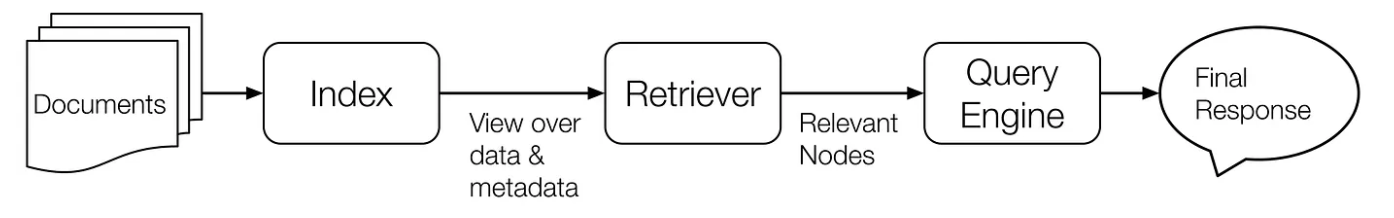

1. Index: It's the "library" of your data - Stores your data.
2. Retriever: It's the "librarian" that finds relevant data - Finds data.
3. Response Synthesizer: It's the "storyteller" that creates a response - Makes responses.
4. QueryEngine: It's the "director" that makes everything work together - Coordinates everything.

# Building High-Level API QA System.

In [ ]:
from llama_index import VectorStoreIndex
import os
import openai
from IPython.display import display, HTML

# Construct an index by loading documents into a VectorStoreIndex.
index = VectorStoreIndex.from_documents(documents)

# Construct Query Engine
query_engine = index.as_query_engine()

# Query the engine.
response = query_engine.query("What is the revenue of uber in 2021?")

# print the synthesized response.
display(HTML(f'<p style="font-size:20px">{response.response}</p>'))


[nltk_data] Downloading package punkt to /tmp/llama_index...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# print the source node text
display(HTML(f'<p style="font-size:20px">{(response.source_nodes[0].get_text())}</p>'))

In [ ]:
# print the source node text
display(HTML(f'<p style="font-size:20px">{(response.source_nodes[1].get_text())}</p>'))

# Building High-Level API Summarization System.

In [ ]:
from llama_index import SummaryIndex

# Construct an index by loading documents into a ListIndex.
index = SummaryIndex.from_documents(documents[0:10])

# Construct Query Engine
query_engine = index.as_query_engine(
    response_mode="tree_summarize")

# Query the engine.
response = query_engine.query("What is the summary of the document?")

# print the synthesized response.
display(HTML(f'<p style="font-size:20px">{response.response}</p>'))


In [ ]:
len(response.source_nodes)

15

# Building Low-Level API QA System.

In [ ]:
from llama_index.retrievers import VectorIndexRetriever
from llama_index.response_synthesizers import get_response_synthesizer
from llama_index.query_engine import RetrieverQueryEngine

# Construct an index by loading documents into a VectorStoreIndex.
index = VectorStoreIndex.from_documents(documents)

# configure retriever
retriever = VectorIndexRetriever(
 index = index,
 similarity_top_k=3
)

# configure response synthesizer
synth = get_response_synthesizer(
    response_mode="accumulate"
)

# construct query engine
query_engine = RetrieverQueryEngine(
 retriever=retriever,
 response_synthesizer=synth,
)

response = query_engine.query("What information do you have about zomato investment?")

In [ ]:
display(HTML(f'<p style="font-size:20px">{response.response}</p>'))

In [ ]:
len(response.source_nodes)

3

In [ ]:
display(HTML(f'<p style="font-size:20px">{response.source_nodes[0].get_text()}</p>'))